In [434]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [435]:
# display all columns
# display all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [436]:
#read data
df=pd.read_csv("train.csv")
#check shape and columns details of the dataframe
print(df.shape)
df.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [437]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#considering the no of cols and levels of categorical variables, we dont have much data rows for model building


### Data preparation

In [438]:
#we can see from above result that some columns are mostly empty, which will not help with analysis
#Identify the these coulmns
(df.isna().sum()/len(df)).sort_values(ascending=False)
#in PoolQC, NA values are not actually null, it means the house has no pool
#similarly for Alley, Fence,  FireplaceQu 

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
MasVnrType       0.597260
FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageCond       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
Electrical       0.000685
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
GrLivArea        0.000000
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea    

In [439]:
#remove missing values as per data dictionary and assumptions
# for LotFrontage as NA, imputing as 0 assuming there is no Linear feet of street connected to property
#GarageYrBlt is NA, for properties which have no garage
#keeping missing values in Electrical avoiding exaggeration 

df.PoolQC.fillna("No_Pool",inplace=True)
df.PoolQC.value_counts()
df.Alley.fillna("Noalleyaccess",inplace=True)
df.Fence.fillna("NoFence",inplace=True)
df.MasVnrType.fillna("NoMason",inplace=True)
df.MasVnrArea.fillna(0,inplace=True)
df.FireplaceQu.fillna("No_FP",inplace=True)
df.fillna({"GarageCond":"NoGarage","GarageType":"NoGarage","GarageFinish":"NoGarage","GarageQual":"NoGarage",},inplace=True)
df.fillna({"BsmtFinType2":"NoBsmt","BsmtExposure":"NoBsmt","BsmtQual":"NoBsmt","BsmtCond":"NoBsmt","BsmtFinType1":"NoBsmt"},\
          inplace=True)
df.LotFrontage.fillna(0,inplace=True)



In [440]:
#drop MiscFeature and corresponding numeric column MiscVal
#col Id 
df=df.drop(["Id","MiscFeature", "MiscVal"], axis=1, errors="ignore")
df.shape

(1460, 78)

In [441]:
(df.isna().sum()/len(df)).sort_values(ascending=False)

GarageYrBlt      0.055479
Electrical       0.000685
MSSubClass       0.000000
BedroomAbvGr     0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
FullBath         0.000000
HalfBath         0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
GarageType       0.000000
GarageFinish     0.000000
MSZoning         0.000000
ScreenPorch      0.000000
SaleCondition    0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
Fence            0.000000
PoolQC           0.000000
PoolArea         0.000000
3SsnPorch        0.000000
GarageCars       0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageCond       0.000000
GarageQual       0.000000
GarageArea       0.000000
CentralAir  

In [442]:
#check no of remaining columns
df.shape

(1460, 78)

In [443]:
#Assign correct data types
#check numerical columns
df.select_dtypes(include=['int64', 'float64']).columns
#for OverallQual,OverallCond are ordinal and encoding is already present, hence keeping it as numerical
#changing 'MSSubClass' to object, as its a nominal variable
df.MSSubClass=df.MSSubClass.astype("object")
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000


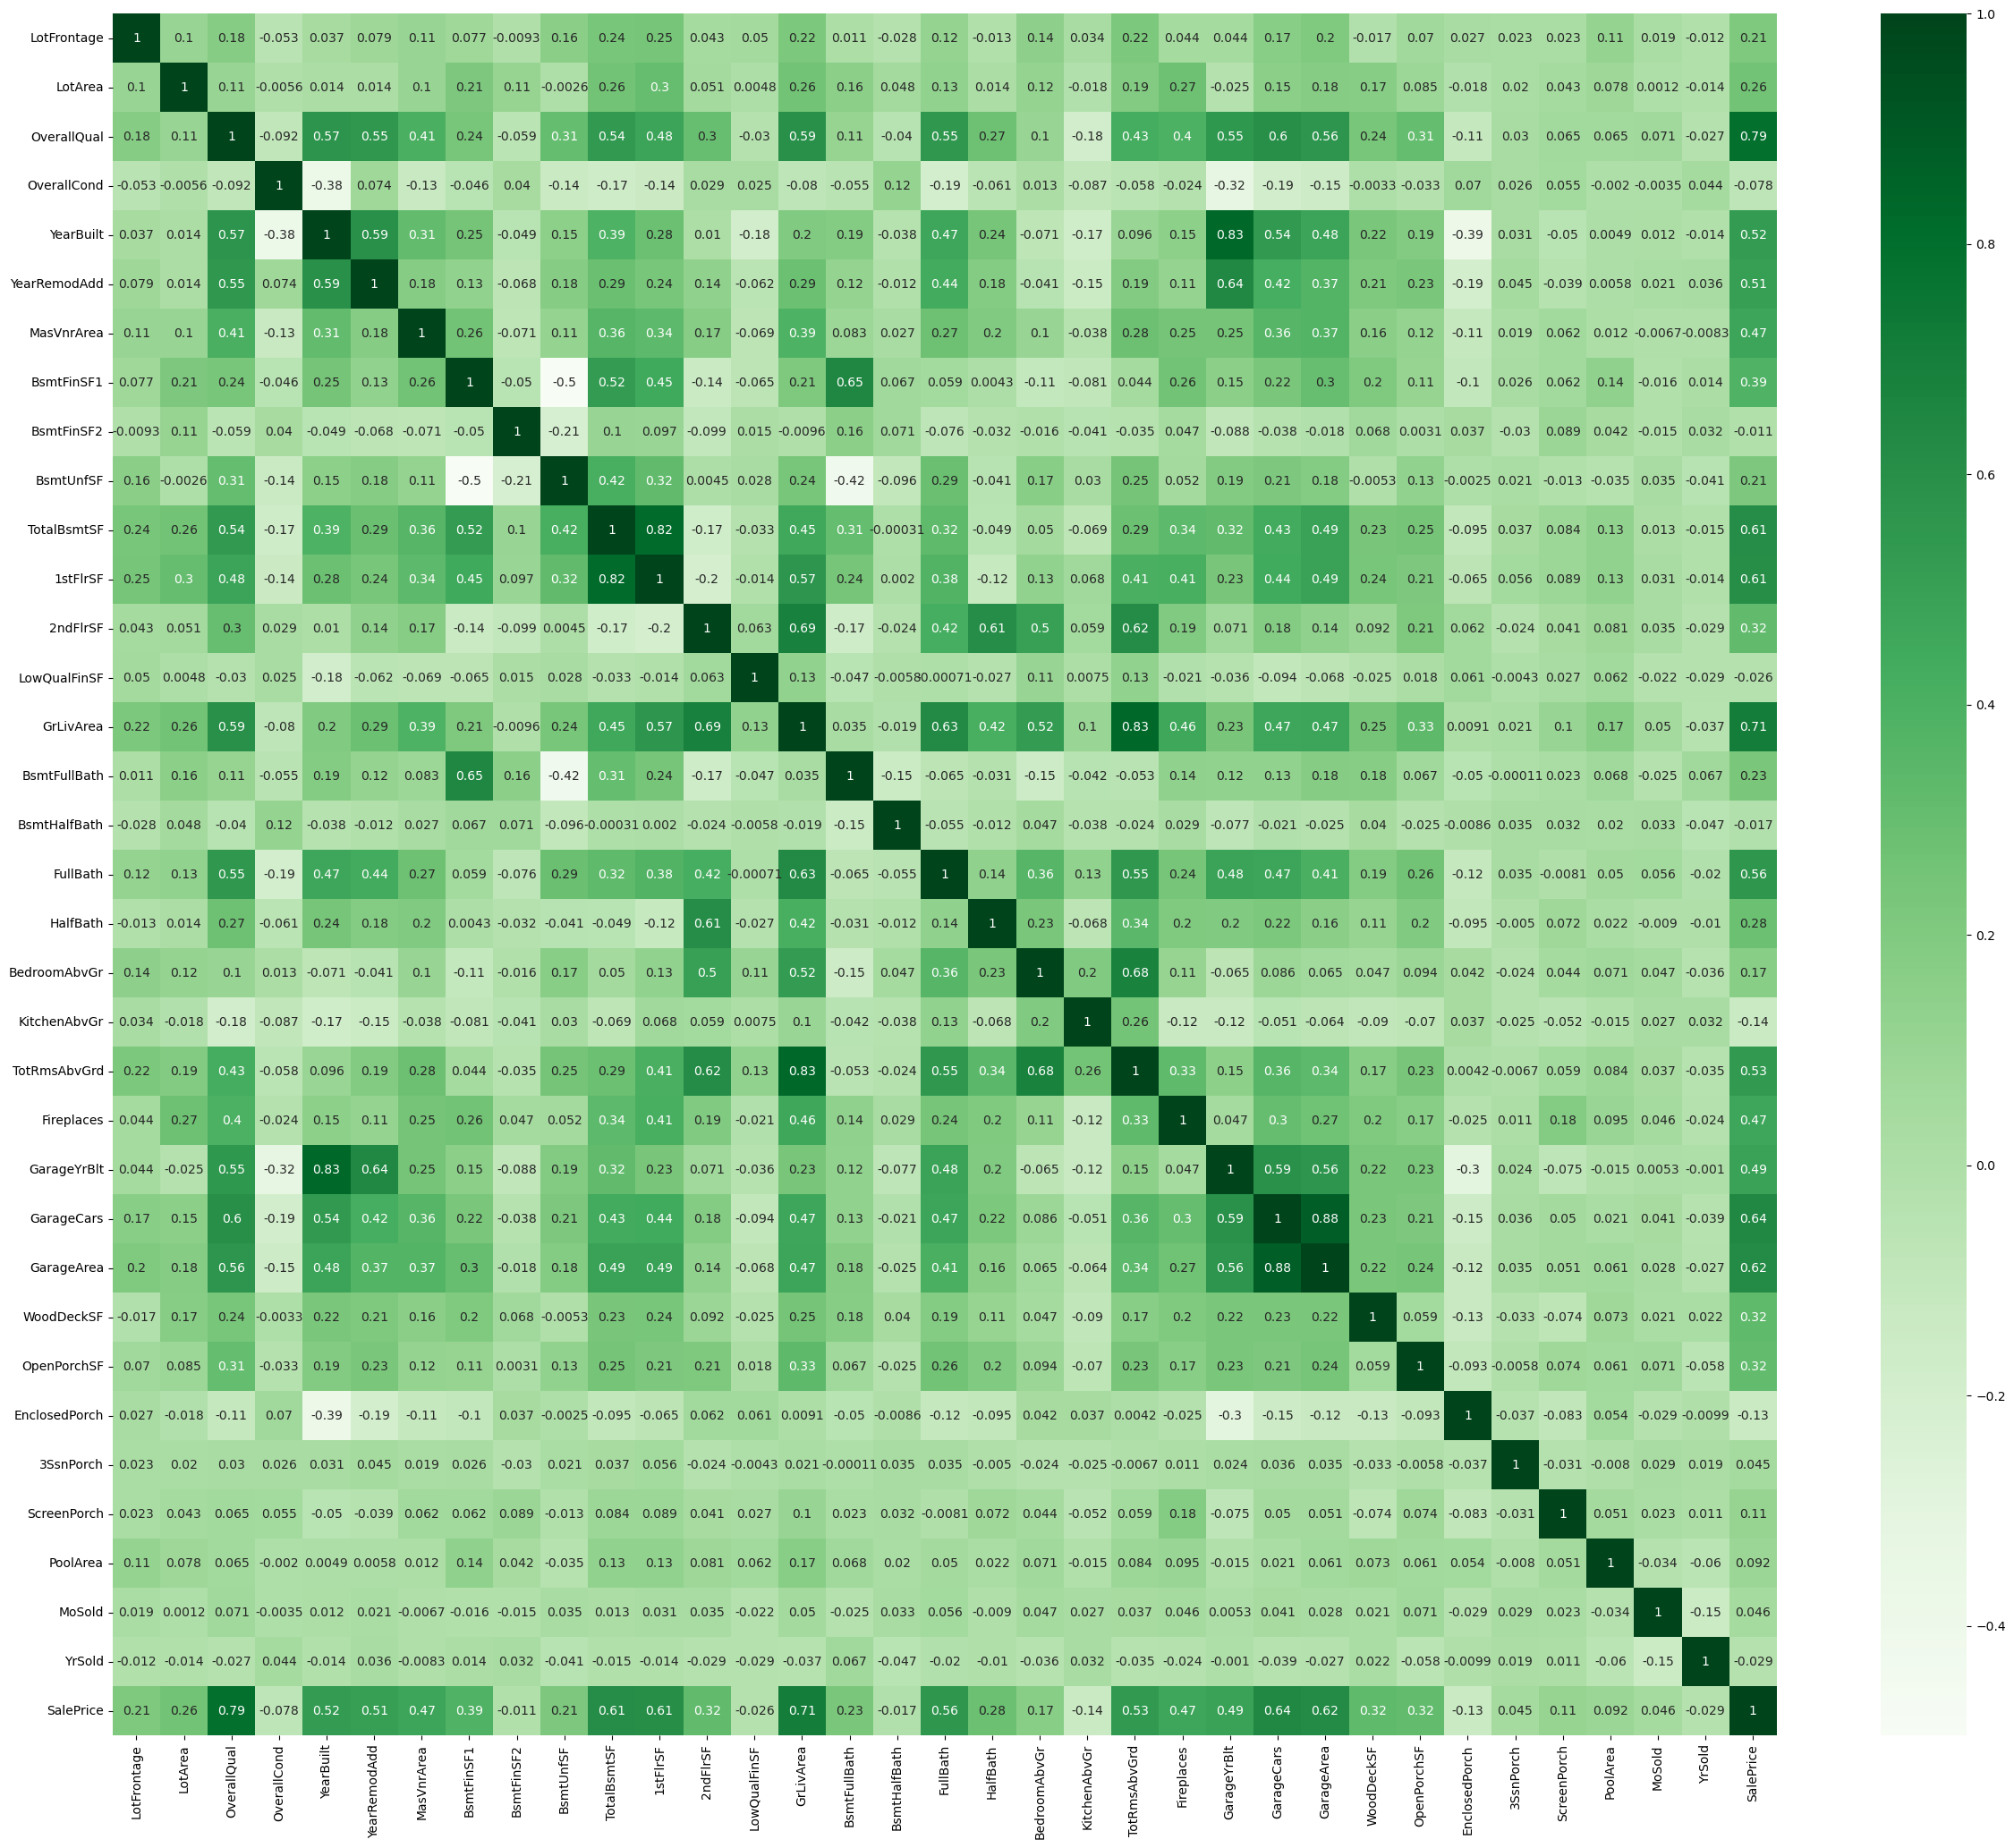

In [444]:
#check the numerical columns
num_cols=df.select_dtypes(include=['int64', 'float64']).columns
#check for correlation
plt.figure(figsize=(30,25))
sns.heatmap(df[num_cols].corr(), annot=True,cmap="Greens")
plt.show()

In [445]:
#from above heat map below pair are moderately and strongly correlated
#(GarageArea, GarageCars),(GarageYrBlt, YearBuilt), (YearRemodAdd, GarageYrBlt), (TotRmsAbvGrd, GrLivArea),(TotalBsmtSF 
#, 1stflrSF), (BedroomAbvGr,TotRmsAbvGrd),(TotRmsAbvGrd,2ndflrSF), (halfbath,2ndflrSF), (BsmtFinSF1,BsmtFullBath),
#(2ndflrSF,GrLivArea),(fullbath, GrLivArea)
                                                                                                                   


In [446]:
col_drop=["GarageCars","GarageYrBlt","TotRmsAbvGrd","TotalBsmtSF","HalfBath","BsmtFullBath",'2ndFlrSF']
#we have also observed for 99% record 1stflrSF+2ndflrSF=GrLivArea and TotalBsmtSF=1stflrSF
df=df.drop(col_drop, axis=1,errors="ignore")
df.shape

(1460, 71)

In [447]:
#plot the numerical variables with target variabale salePrice
num_cols=df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

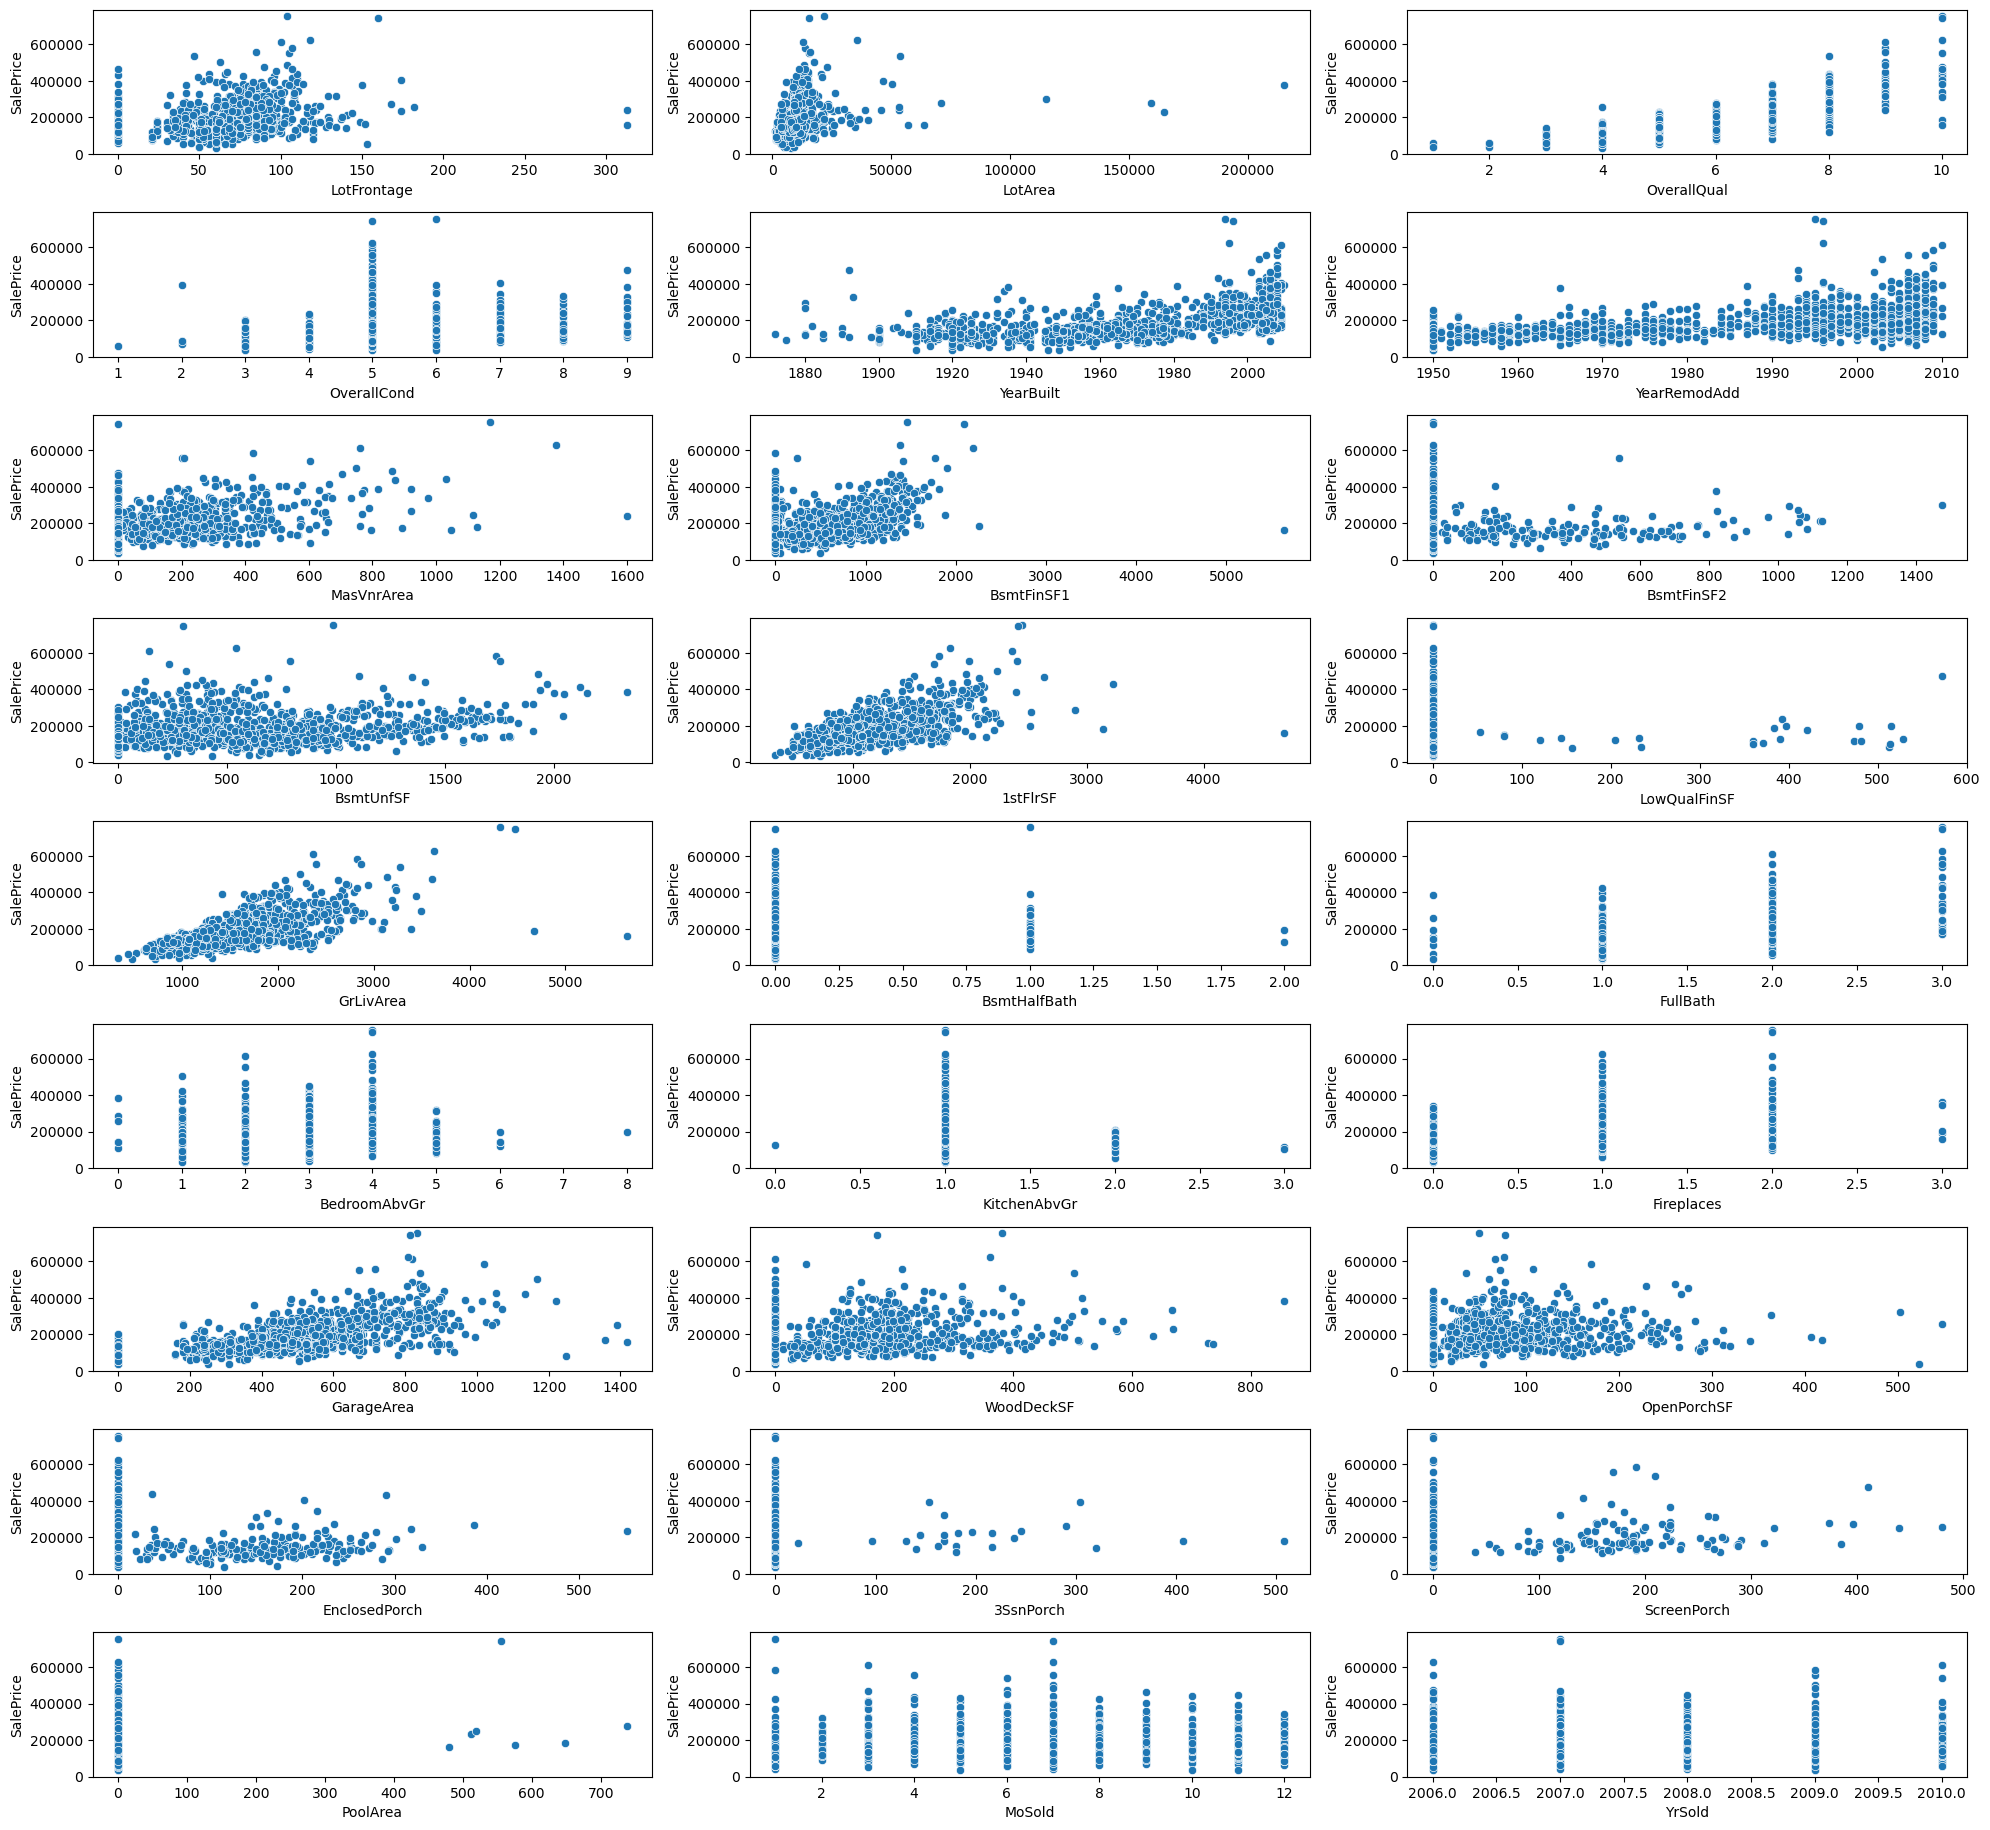

In [448]:
fig=plt.subplots(figsize=(20, 20))

for i, feature in enumerate(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold']):
    plt.subplot(10, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.tight_layout()
  

In [449]:
#some variables showing strong linear relationship with Sales, as GRlivrea, OverallQual,LotArea, BsmtFinSF1,1stFlrSF
#hence, we can start with performing linear regression

In [450]:
#PoolArea, PooLQC, KitchenAbvGR has highly imbalanced data, hence removing these
#df.drop(["PoolArea","PoolQC"(corresponding qualitative metric),"KitchenAbvGr"],inplace=True, axis=1, errors="ignore")
#MoSold is also showing generic pattern for all months, dropping this also
print(df.PoolQC.value_counts())
df.drop(["PoolArea","PoolQC","KitchenAbvGr","MoSold"],inplace=True, axis=1, errors="ignore")
#check summary stats
#instead of having the YearBuilt, YearRemodAdd and YrSold, derive variable age and age_remd at the time of sale
df["age"]=df["YrSold"]-df["YearBuilt"]
df["age_remd"]=df["YrSold"]-df["YearRemodAdd"]
(df[df["age_remd"]<0])
#setting age_remd as zero where YearRemodAdd>YrSold, as during the time of sale no remodelling is done for this property
df["age_remd"][df["age_remd"]<0]=0
#dropping original variable variable YrSold, YearRemodAdd, YearBuilt
df.drop(["YrSold", "YearRemodAdd", "YearBuilt"],inplace=True, axis=1, errors="ignore")

df.describe()

#the data has outlier, we will treat these if model output does not come good

PoolQC
No_Pool    1453
Gd            3
Ex            2
Fa            2
Name: count, dtype: int64


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,age,age_remd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1162.626712,5.844521,1515.463699,0.057534,1.565068,2.866438,0.613014,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,180921.195890,36.547945,22.950685
std,34.664304,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,386.587738,48.623081,525.480383,0.238753,0.550916,0.815778,0.644666,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,79442.502883,30.250152,20.639875
min,0.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000
25%,42.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,882.000000,0.000000,1129.500000,0.000000,1.000000,2.000000,0.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000,4.000000
50%,63.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,3.000000,1.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,14.000000
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1391.250000,0.000000,1776.750000,0.000000,2.000000,3.000000,1.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,214000.000000,54.000000,41.000000
max,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,4692.000000,572.000000,5642.000000,2.000000,3.000000,8.000000,3.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,755000.000000,136.000000,60.000000


In [451]:
df.shape

(1460, 66)

In [452]:
#remaining numerical columns we have 
num_cols=df.select_dtypes(include=['int64', 'float64']).columns
num_cols
#among these 'OverallQual', 'OverallCond' are ordinal variable

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'SalePrice', 'age', 'age_remd'],
      dtype='object')

In [453]:
#check for distribution
#plt.figure(figsize=(30,25))
#for i,feature in enumerate(num_cols):
#    plt.subplot(9, 3, i+1)
    #plt.subplots_adjust(hspace = 2.0)
    #sns.distplot(df[feature],bins=20)
    #plt.tight_layout()

42


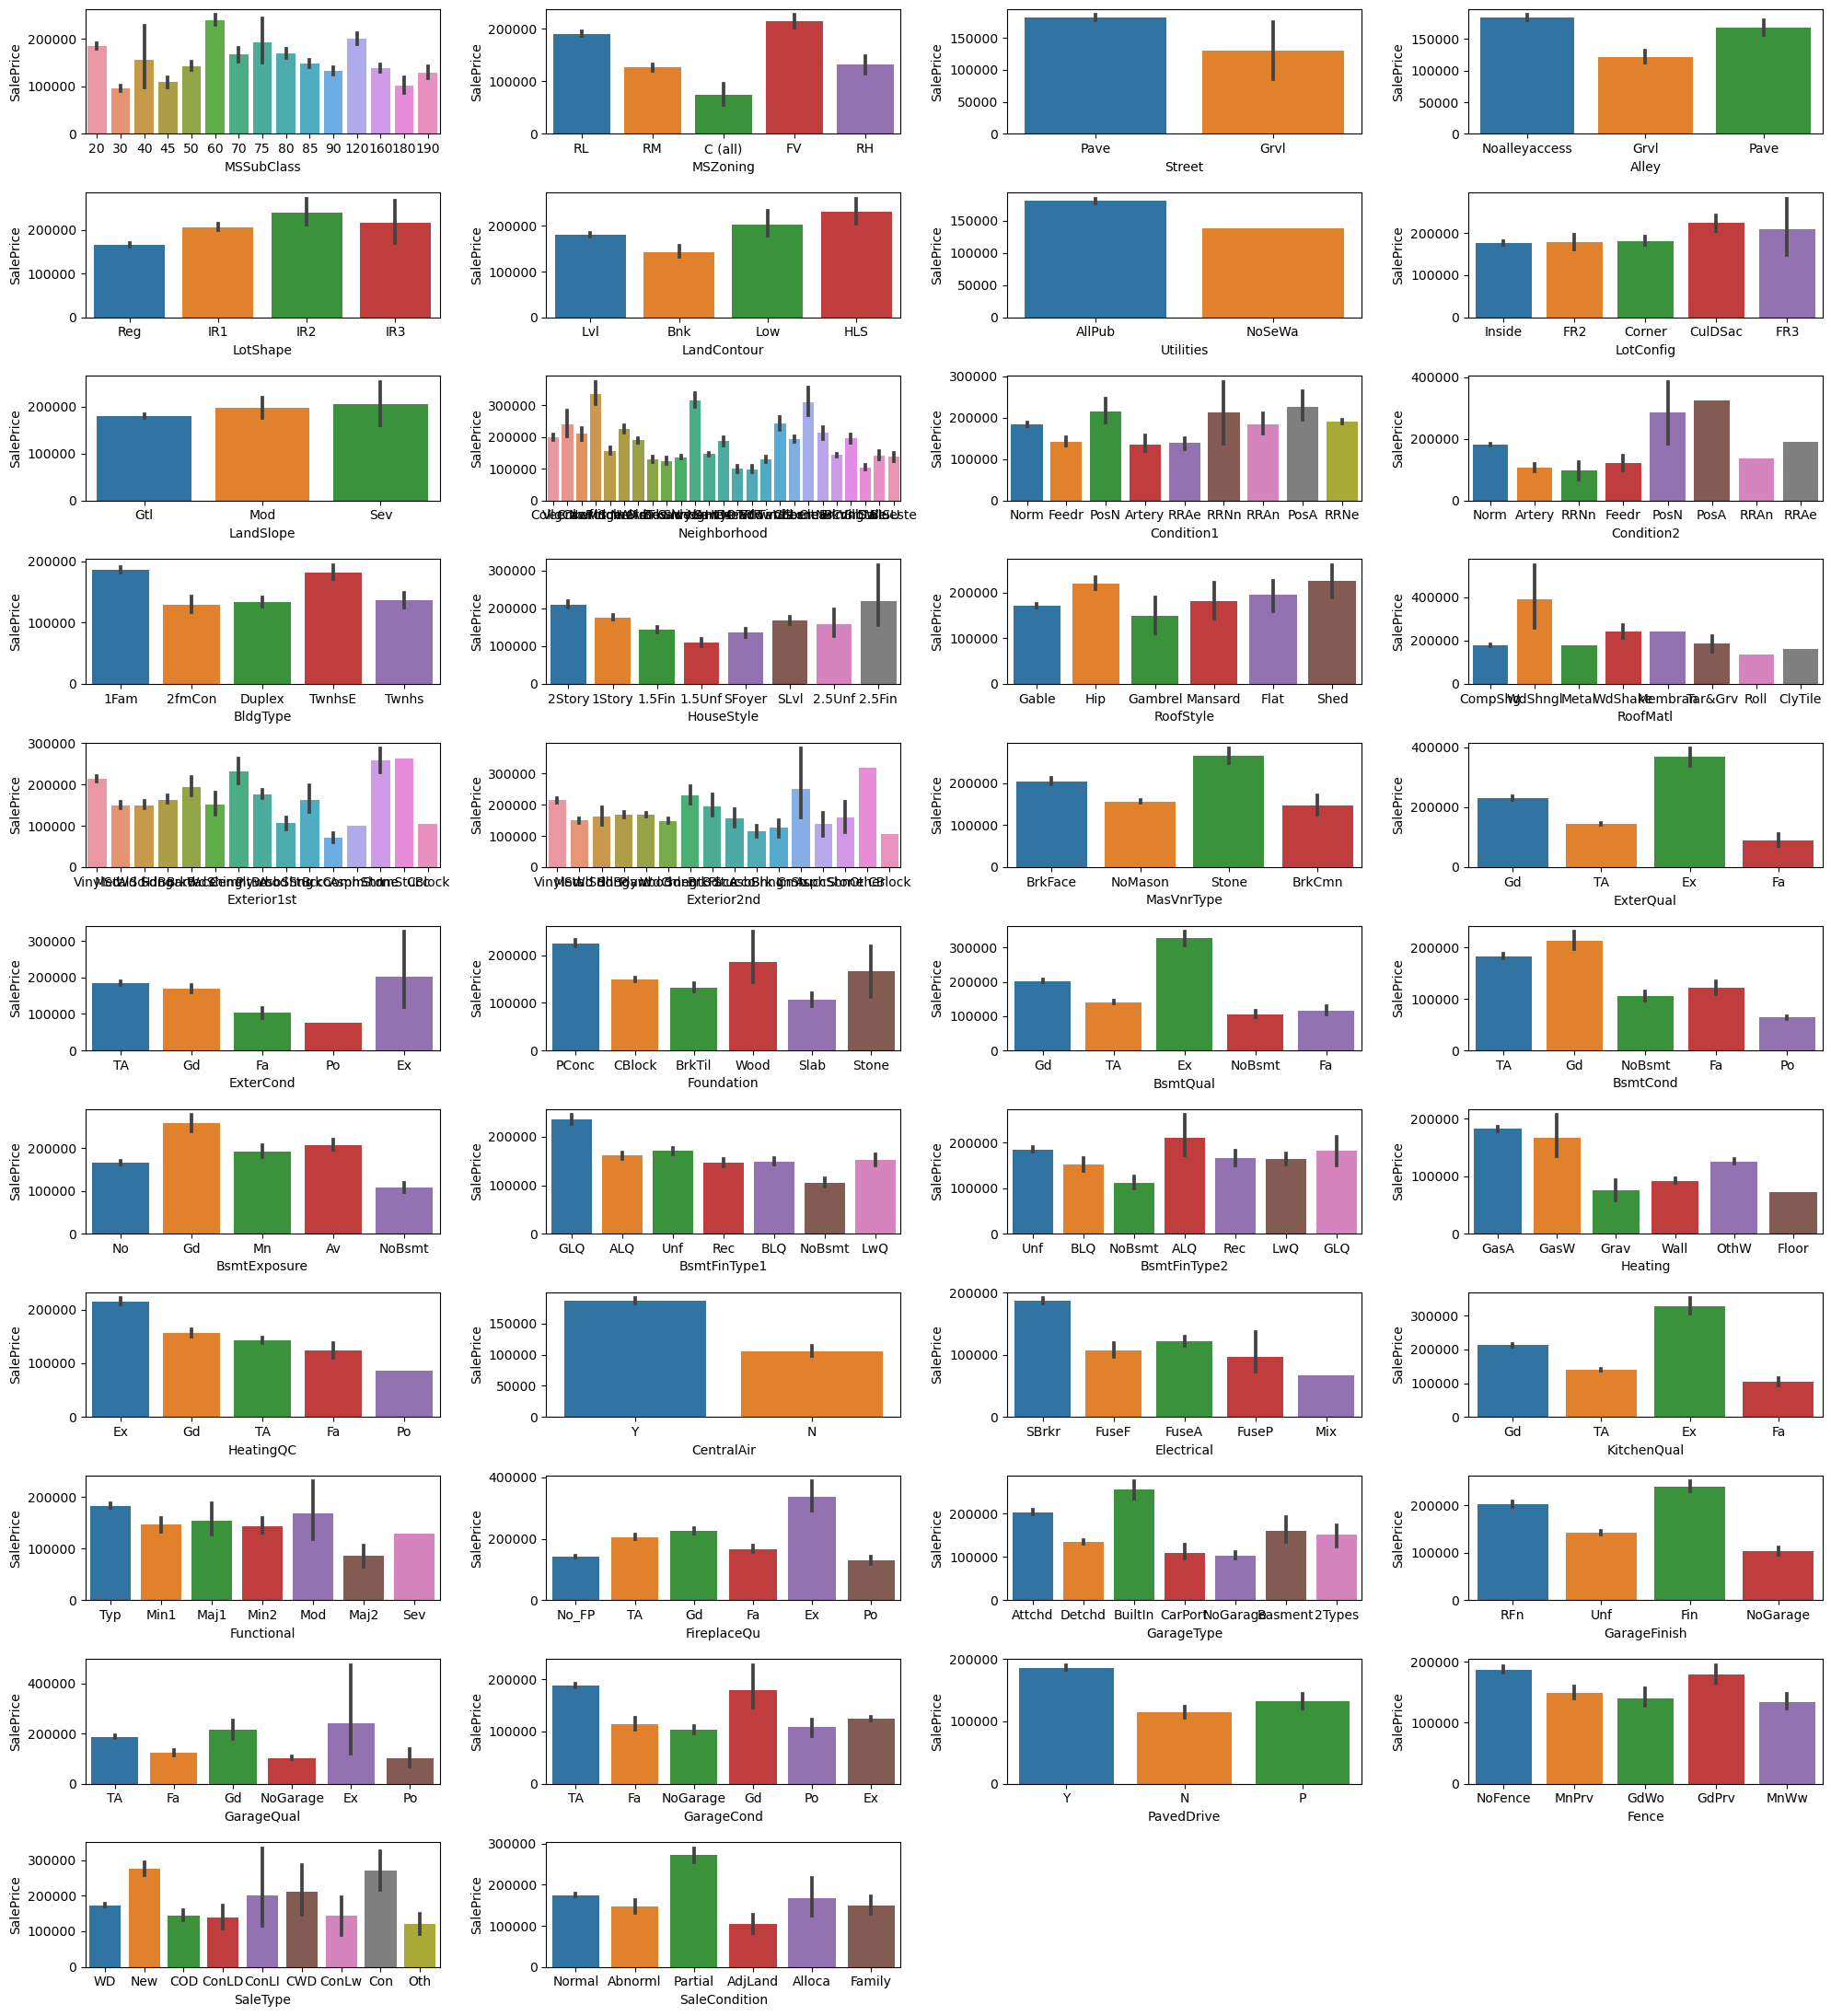

In [454]:
#check non-numerical columns
#check mean sales for each categorical features against their levels

cat=df.select_dtypes(include=["object"]).columns
print(len(cat))
fig=plt.subplots(figsize=(20, 22))

for i, feature in enumerate(cat):
    plt.subplot(11, 4, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=df[feature], y=df['SalePrice'],estimator="mean")
    plt.tight_layout()
    


In [455]:
#Some of the categorical variables are also influencing sales, we will check in model results if these influencers are 
#significant or not
# dropping rows with null values in 'Electrical', for very low missing value count
df.dropna(subset=['Electrical'], inplace=True)

In [456]:
#convert non-numerical columns to numericals
df.select_dtypes(include=["object"]).columns


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [457]:
#encoding the nominal variables
nom_var=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 
       'Foundation','Heating','CentralAir','Electrical','Functional','GarageType',
       'GarageFinish','PavedDrive',
       'SaleType', 'SaleCondition']

nom=df[nom_var]
dummy_df = pd.get_dummies(nom, drop_first=True,dtype=int, columns=nom_var,prefix=nom_var)
dummy_df.shape
#define a custom label encoding function



(1459, 173)

In [458]:
dummy_df.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Noalleyaccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NoMason,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0

**Comment:**

- Adding 173 features to the existing dataset will make the model very complex.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [459]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'Bld

In [460]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1,errors="ignore")

print(dummy_df.shape)
df.shape

(1459, 60)


(1459, 66)

In [461]:
# Adding the dummy variables to the original dataframe
df = pd.concat([df,dummy_df],axis=1)

# Dropping the redundant columns
df = df.drop(nom_var,axis=1, errors="ignore")

In [462]:
#60+66-29=97 columns
df.shape

(1459, 97)

In [463]:
df.select_dtypes("object").columns

Index(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageQual', 'GarageCond', 'Fence'],
      dtype='object')

In [464]:
#encoding the ordinal variables
ord_var=['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageQual', 'GarageCond', 'Fence']
for i in ord_var:
     print(df[i].value_counts().index)


Index(['TA', 'Gd', 'Ex', 'Fa'], dtype='object', name='ExterQual')
Index(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype='object', name='ExterCond')
Index(['TA', 'Gd', 'Ex', 'NoBsmt', 'Fa'], dtype='object', name='BsmtQual')
Index(['TA', 'Gd', 'Fa', 'NoBsmt', 'Po'], dtype='object', name='BsmtCond')
Index(['No', 'Av', 'Gd', 'Mn', 'NoBsmt'], dtype='object', name='BsmtExposure')
Index(['Unf', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'NoBsmt'], dtype='object', name='BsmtFinType1')
Index(['Unf', 'Rec', 'LwQ', 'NoBsmt', 'BLQ', 'ALQ', 'GLQ'], dtype='object', name='BsmtFinType2')
Index(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype='object', name='HeatingQC')
Index(['TA', 'Gd', 'Ex', 'Fa'], dtype='object', name='KitchenQual')
Index(['No_FP', 'Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype='object', name='FireplaceQu')
Index(['TA', 'NoGarage', 'Fa', 'Gd', 'Ex', 'Po'], dtype='object', name='GarageQual')
Index(['TA', 'NoGarage', 'Fa', 'Gd', 'Po', 'Ex'], dtype='object', name='GarageCond')
Index(['NoFence', 'MnPrv', 'GdPrv', 'GdWo', 'M

In [465]:
#creating the order
ExterQual=[ 'Fa', 'TA','Gd','Ex' ]
ExterCond=[ "Po",'Fa', 'TA','Gd','Ex' ]
BsmtQual=[ "NoBsmt",'Fa', 'TA','Gd','Ex']
BsmtCond=['NoBsmt', 'Po','Fa', 'Gd','TA']
BsmtExposure=['NoBsmt','No','Mn','Av','Gd']
BsmtFinType1=['NoBsmt','Unf', 'LwQ','Rec', 'BLQ','ALQ','GLQ']
BsmtFinType2=['NoBsmt','Unf', 'LwQ','Rec', 'BLQ', 'ALQ', 'GLQ']
HeatingQC=["Po",'Fa', 'TA','Gd','Ex' ]
KitchenQual=[ 'Fa', 'TA','Gd','Ex' ]
FireplaceQu=['No_FP', "Po",'Fa', 'TA','Gd','Ex' ]
GarageQual=[ 'NoGarage',"Po",'Fa', 'TA','Gd','Ex' ]
GarageCond=[ 'NoGarage',"Po",'Fa', 'TA','Gd','Ex' ]
#PoolQC=['No_Pool','Fa','Gd', 'Ex']
Fence=['NoFence', 'MnWw','GdWo','MnPrv', 'GdPrv']



In [466]:
ord_enc=OrdinalEncoder(categories=[ExterQual])
df[["ExterQual"]]=ord_enc.fit_transform(df[["ExterQual"]])

ord_enc=OrdinalEncoder(categories=[ExterCond])
df[["ExterCond"]]=ord_enc.fit_transform(df[["ExterCond"]])

ord_enc=OrdinalEncoder(categories=[BsmtQual])
df[["BsmtQual"]]=ord_enc.fit_transform(df[["BsmtQual"]])

ord_enc=OrdinalEncoder(categories=[BsmtCond])
df[["BsmtCond"]]=ord_enc.fit_transform(df[["BsmtCond"]])

ord_enc=OrdinalEncoder(categories=[BsmtExposure])
df[["BsmtExposure"]]=ord_enc.fit_transform(df[["BsmtExposure"]])

ord_enc=OrdinalEncoder(categories=[BsmtFinType1])
df[["BsmtFinType1"]]=ord_enc.fit_transform(df[["BsmtFinType1"]])

ord_enc=OrdinalEncoder(categories=[BsmtFinType1])
df[["BsmtFinType2"]]=ord_enc.fit_transform(df[["BsmtFinType2"]])

ord_enc=OrdinalEncoder(categories=[HeatingQC])
df[["HeatingQC"]]=ord_enc.fit_transform(df[["HeatingQC"]])

ord_enc=OrdinalEncoder(categories=[KitchenQual])
df[["KitchenQual"]]=ord_enc.fit_transform(df[["KitchenQual"]])

ord_enc=OrdinalEncoder(categories=[FireplaceQu])
df[["FireplaceQu"]]=ord_enc.fit_transform(df[["FireplaceQu"]])

ord_enc=OrdinalEncoder(categories=[GarageQual])
df[["GarageQual"]]=ord_enc.fit_transform(df[["GarageQual"]])

ord_enc=OrdinalEncoder(categories=[GarageCond])
df[["GarageCond"]]=ord_enc.fit_transform(df[["GarageCond"]])

ord_enc=OrdinalEncoder(categories=[Fence])
df[["Fence"]]=ord_enc.fit_transform(df[["Fence"]])

df.shape


(1459, 97)

In [467]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 97 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1459 non-null   float64
 1   LotArea                1459 non-null   int64  
 2   OverallQual            1459 non-null   int64  
 3   OverallCond            1459 non-null   int64  
 4   MasVnrArea             1459 non-null   float64
 5   ExterQual              1459 non-null   float64
 6   ExterCond              1459 non-null   float64
 7   BsmtQual               1459 non-null   float64
 8   BsmtCond               1459 non-null   float64
 9   BsmtExposure           1459 non-null   float64
 10  BsmtFinType1           1459 non-null   float64
 11  BsmtFinSF1             1459 non-null   int64  
 12  BsmtFinType2           1459 non-null   float64
 13  BsmtFinSF2             1459 non-null   int64  
 14  BsmtUnfSF              1459 non-null   int64  
 15  HeatingQC

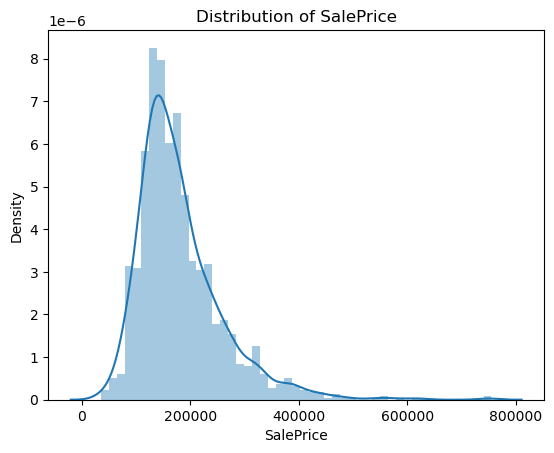

In [468]:
#all the columns are converted to numerical, no missing value
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot((df['SalePrice']))
plt.show()
#Since SalePrice is highly right skewed, checking the distribution of log transformed SalePrice.
#we also built models with SalePrice separately and got below pattern between error/predicted SalePrice. The pattern looks 
#like an exponential curve, violating the assumption of linear regression. We avoided this 
#by using log transformed SalePrice instead SalePrice.


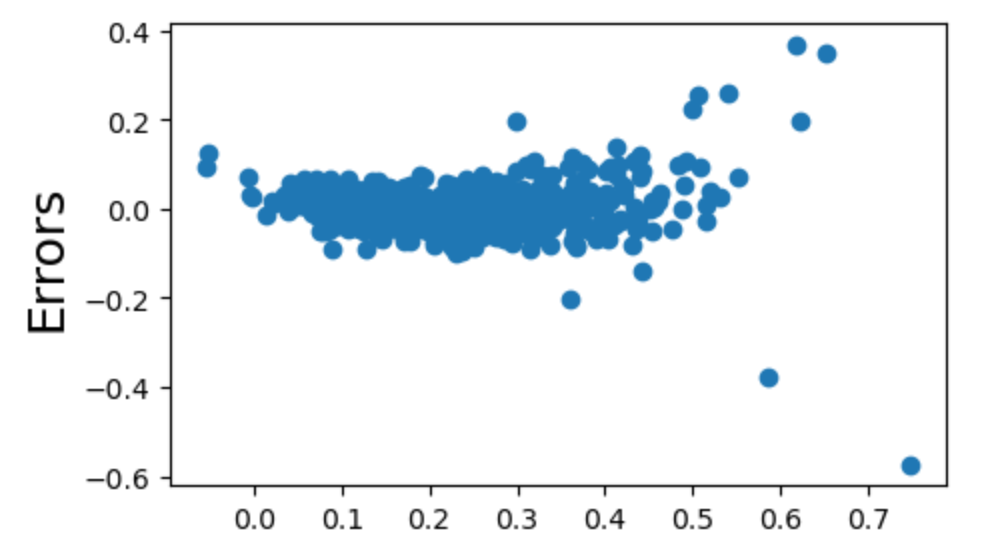

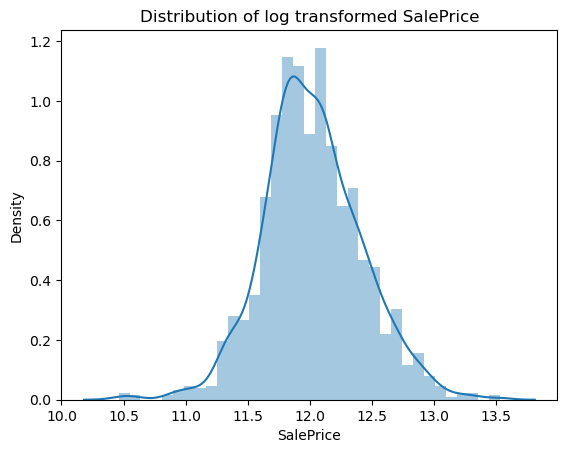

In [469]:
sns.distplot(np.log(df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [470]:
#the distribution is somewhat normal after log transformation
df1=df
df1["logsales"]=np.log(df['SalePrice'])
df1=df1.drop(['SalePrice'], axis=1)
df1.shape

(1459, 97)

In [471]:
df1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,age,age_remd,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Noalleyaccess,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_NoMason,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,CentralAir_Y,Electrical_SBrkr,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,logsales
0,65.0,8450,7,5,196.0,2.0,2.0,3.0,4.0,1.0,6.0,706,1.0,0,150,4.0,856,0,1710,0,2,3,2.0,0,0.0,548,3.0,3.0,0,61,0,0,0,0.0,5,5,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,12.247694
1,80.0,9600,6,8,0.0,1.0,2.0,3.0,4.0,4.0,5.0,978,1.0,0,284,4.0,1262,0,1262,1,2,3,1.0,1,3.0,460,3.0,3.0,298,0,0,0,0,0.0,31,31,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,12.109011
2,68.0,11250,7,5,162.0,2.0,2.0,3.0,4.0,2.0,6.0,486,1.0,0,434,4.0,920,0,1786,0,2,3,2.0,1,3.0,608,3.0,3.0,0,42,0,0,0,0.0,7,6,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,12.317167
3,60.0,9550,7,5,0.0,1.0,2.0,2.0,3.0,1.0,5.0,216,1.0,0,540,3.0,961,0,1717,0,1,3,2.0,1,4.0,642,3.0,3.0,0,35,272,0,0,0.0,91,36,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,11.849398
4,84.0,14260,8,5,350.0,2.0,2.0,3.0,4.0,3.0,6.0,655,1.0,0,490,4.0,1145,0,2198,0,2,4,2.0,1,3.0,836,3.0,3.0,192,84,0,0,0,0.0,8,8,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,12.429216


### Divide the dataset into train and test dataset


In [472]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(1)
df1_train, df1_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)
df1_train.shape

(1021, 97)

In [473]:
df1_train.head()
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'SalePrice', 'age', 'age_remd'],
      dtype='object')

### Scaling the train data set

In [474]:
#As interpretaion of the driving fearure are important goal here as requested bu Business, we are opting for min-max scaling 
#over standardization as standardization changes changes the distribution of original data, making interpretaion difficult
scaler=MinMaxScaler()
#rescale only the continous variables, as other variables are categorical and no meaning in difference of their respective levels
num_cols=num_cols.drop(['SalePrice'],errors="ignore")
num_cols=num_cols.insert(loc=23,item="logsales")
print(num_cols)
print(num_cols.shape)
df1_train[num_cols]=scaler.fit_transform(df1_train[num_cols])
df1_train.head()


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'age', 'age_remd', 'logsales'],
      dtype='object')
(24,)


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,age,age_remd,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Noalleyaccess,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_NoMason,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,CentralAir_Y,Electrical_SBrkr,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,logsales
984,0.239617,0.040455,0.444444,0.500,0.000,1.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,2.0,0.215278,0.0,0.249039,0.0,0.666667,0.500,2.0,0.000000,0.0,0.380113,3.0,3.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.235294,0.533333,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0.417599
1416,0.191693,0.046139,0.333333,0.625,0.000,1.0,2.0,2.0,4.0,1.0,1.0,0.000000,1.0,0.000000,0.332620,3.0,0.202315,0.0,0.355880,0.0,0.666667,0.500,1.0,0.000000,0.0,0.394922,3.0,3.0,0.000000,0.00000,0.206522,0.0,0.0,0.0,0.919118,1.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0.408435
390,0.159744,0.032409,0.444444,0.875,0.000,1.0,2.0,2.0,3.0,1.0,3.0,0.042700,4.0,0.265265,0.098031,4.0,0.136343,0.0,0.178517,0.0,0.333333,0.500,1.0,0.000000,0.0,0.270804,3.0,3.0,0.000000,0.23766,0.202899,0.0,0.0,3.0,0.794118,0.966667,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,1,0,1,1,0,0.399006
877,0.236422,0.034416,0.888889,0.500,0.135,2.0,2.0,4.0,4.0,1.0,6.0,0.207300,1.0,0.000000,0.125000,4.0,0.252315,0.0,0.343198,0.0,0.666667,0.500,3.0,0.333333,4.0,0.520451,3.0,3.0,0.214702,0.00000,0.000000,0.0,0.0,0.0,0.036765,0.066667,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0.749926
567,0.223642,0.040670,0.666667,0.500,0.105,2.0,2.0,3.0,4.0,1.0,6.0,0.000354,1.0,0.000000,0.648545,4.0,0.269213,0.0,0.210799,0.0,0.666667,0.375,2.0,0.000000,0.0,0.375176,3.0,3.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.044118,0.100000,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0.589900


In [475]:
#check the summary stats
print(df1_train.shape)
df1_train.describe()

(1021, 97)


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,age,age_remd,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Noalleyaccess,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_NoMason,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,CentralAir_Y,Electrical_SBrkr,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,logsales
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.185363,0.042862,0.568071,0.571376,0.065392,1.405485,2.088149,2.509305,3.761998,1.663075,3.531832,0.078119,1.268364,0.034594,0.243378,3.139079,0.185720,0.011340,0.208373,0.029383,0.521384,0.356513,1.510284,0.208293,1.875612,0.334135,2.808031,2.81097,0.108930,0.090376,0.042082,0.007456,0.030591,0.552400,0.270417,0.390336,0.099902,0.204701,0.061704,0.784525,0.151812,0.994123,0.934378,0.634672,0.900098,0.066601,0.712047,0.089128,0.073457,0.056807,0.155730,0.047013,0.055828,0.078355,0.046033,0.063663,0.055828,0.860921,0.990206,0.078355,0.492654,0.299706,0.783546,0.192948,0.980411,0.146915,0.156709,0.070519,0.341822,0.147894,0.136141,0.151812,0.099902,0.334966,0.138100,0.298727,0.600392,0.090108,0.421156,0.448580,0.973555,0.924584,0.911851,0.932419,0.600392,0.062684,0.258570,0.053869,0.053869,0.287953,0.408423,0.913810,0.088149,0.856024,0.813908,0.088149,0.510224
std,0.110462,0.048898,0.156519,0.139376,0.117698,0.582531,0.351560,0.814791,0.792839,1.099063,2.127370,0.083929,0.957155,0.115514,0.192398,0.969258,0.092401,0.092088,0.101823,0.121746,0.184074,0.102561,0.670924,0.216259,1.825528,0.152272,0.707366,0.70885,0.149347,0.128769,0.114615,0.061580,0.112109,1.187536,0.224809,0.349210,0.300016,0.403681,0.240735,0.411353,0.359014,0.076471,0.247741,0.481758,0.300016,0.249453,0.453031,0.285068,0.261014,0.231587,0.362777,0.211770,0.229701,0.268860,0.209660,0.2

### Dividing into X and Y sets for the model building

In [476]:
y_train=df1_train["logsales"]
X_train=df1_train.drop("logsales",axis=1)
X_train.head()


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,age,age_remd,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Noalleyaccess,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_NoMason,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,CentralAir_Y,Electrical_SBrkr,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
984,0.239617,0.040455,0.444444,0.500,0.000,1.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,2.0,0.215278,0.0,0.249039,0.0,0.666667,0.500,2.0,0.000000,0.0,0.380113,3.0,3.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.235294,0.533333,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,1,0
1416,0.191693,0.046139,0.333333,0.625,0.000,1.0,2.0,2.0,4.0,1.0,1.0,0.000000,1.0,0.000000,0.332620,3.0,0.202315,0.0,0.355880,0.0,0.666667,0.500,1.0,0.000000,0.0,0.394922,3.0,3.0,0.000000,0.00000,0.206522,0.0,0.0,0.0,0.919118,1.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0
390,0.159744,0.032409,0.444444,0.875,0.000,1.0,2.0,2.0,3.0,1.0,3.0,0.042700,4.0,0.265265,0.098031,4.0,0.136343,0.0,0.178517,0.0,0.333333,0.500,1.0,0.000000,0.0,0.270804,3.0,3.0,0.000000,0.23766,0.202899,0.0,0.0,3.0,0.794118,0.966667,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,1,0,1,1,0
877,0.236422,0.034416,0.888889,0.500,0.135,2.0,2.0,4.0,4.0,1.0,6.0,0.207300,1.0,0.000000,0.125000,4.0,0.252315,0.0,0.343198,0.0,0.666667,0.500,3.0,0.333333,4.0,0.520451,3.0,3.0,0.214702,0.00000,0.000000,0.0,0.0,0.0,0.036765,0.066667,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0
567,0.223642,0.040670,0.666667,0.500,0.105,2.0,2.0,3.0,4.0,1.0,6.0,0.000354,1.0,0.000000,0.648545,4.0,0.269213,0.0,0.210799,0.0,0.666667,0.375,2.0,0.000000,0.0,0.375176,3.0,3.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.044118,0.100000,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0


### Model building
### Hyperparameter Tuning Using Grid Search Cross-Validation


In [477]:
# number of features in X_train
len(X_train.columns)


96

In [478]:
hyper_params = [{'n_features_to_select': list(range(1, 98,5))}]
hyper_params

[{'n_features_to_select': [1,
   6,
   11,
   16,
   21,
   26,
   31,
   36,
   41,
   46,
   51,
   56,
   61,
   66,
   71,
   76,
   81,
   86,
   91,
   96]}]

In [479]:
# step-1: create a 5 fold cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = hyper_params = [{'n_features_to_select': list(range(1, 98,5))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 6, 11, 16, 21, 26, 31, 36,
                                                   41, 46, 51, 56, 61, 66, 71,
                                                   76, 81, 86, 91, 96]}],
             return_train_score=True, scoring='r2', verbose=1)

In [480]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.898246,0.231312,0.006181,0.000305,1,{'n_features_to_select': 1},0.601356,0.602770,0.743721,0.663685,0.683917,0.659090,0.053488,20,0.679271,0.678100,0.640969,0.664629,0.659614,0.664517,0.014005
1,1.959082,0.323410,0.006191,0.000528,6,{'n_features_to_select': 6},0.646940,0.831426,0.845203,0.797911,0.847507,0.793798,0.075535,19,0.851673,0.820931,0.759823,0.823841,0.817272,0.814708,0.030025
2,1.814105,0.266324,0.006477,0.000659,11,{'n_features_to_select': 11},0.608997,0.840826,0.879405,0.802447,0.840045,0.794344,0.095816,18,0.883072,0.836967,0.816590,0.843224,0.835689,0.843108,0.021877
3,2.006346,0.394327,0.007325,0.001673,16,{'n_features_to_select': 16},0.636497,0.841323,0.885488,0.817519,0.845922,0.805350,0.087203,17,0.893215,0.843603,0.830582,0.852006,0.844667,0.852815,0.021346
4,1.582850,0.303882,0.007771,0.001289,21,{'n_features_to_select': 21},0.652503,0.837869,0.892420,0.819073,0.857074,0.811788,0.083256,16,0.901065,0.845779,0.833622,0.865608,0.858234,0.860862,0.022870
5,1.299419,0.182303,0.010485,0.003590,26,{'n_features_to_select': 26},0.653680,0.848771,0.884874,0.817617,0.857572,0.812503,0.082262,15,0.903669,0.858694,0.841263,0.870180,0.862357,0.867233,0.020530
6,1.166002,0.197585,0.007516,0.000600,31,{'n_features_to_select': 31},0.655291,0.855043,0.893061,0.825724,0.861336,0.818091,0.084164,14,0.905146,0.871886,0.852312,0.877657,0.869700,0.875340,0.017133
7,1.230415,0.271594,0.007819,0.001300,36,{'n_features_to_select': 36},0.660669,0.857706,0.900675,0.823874,0.868094,0.822204,0.084404,10,0.906928,0.877545,0.860116,0.881611,0.877864,0.880813,0.015036
8,1.475869,0.291957,0.009281,0.002099,41,{'n_features_to_select': 41},0.660103,0.855922,0.895849,0.825493,0.863662,0.820206,0.083123,13,0.907900,0.878395,0.862366,0.886035,0.879960,0.882931,0.014734
9,1.164427,0.209396,0.006738,0.000770,46,{'n_features_to_select': 46},0.667762,0.855821,0.897771,0.825838,0.864652,0.822369,0.080632,9,0.908411,0.880358,0.865806,0.886906,0.882412,0.884779,0.013771


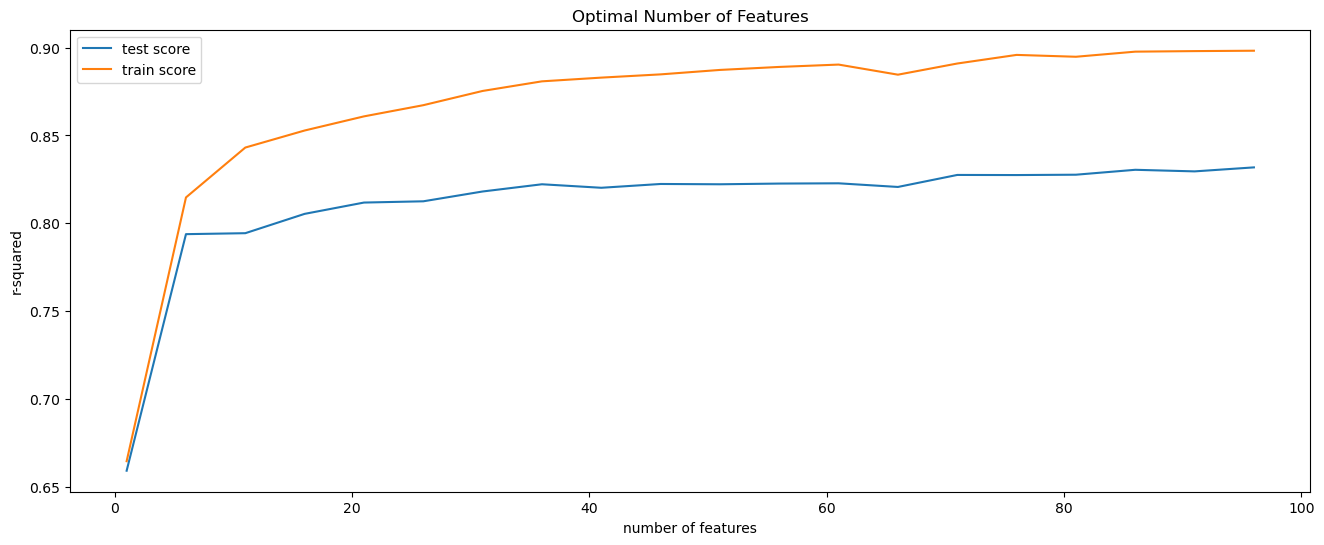

In [481]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [482]:
#as per the above graphs for feature no>46, test R2 is not much increaed and but train square is still increasing.
#optimal no of features is 46
#build the LM model with same no of feature
n_features_optimal = 46

#columns which are selected by RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=46)             # running RFE
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]
col=X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtQual',
       'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'age', 'age_remd',
       'MSSubClass_120', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm',
       'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng',
       'Foundation_PConc', 'Functional_Typ', 'GarageFinish_NoGarage',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

### Linear Regression

#### Residual analysis

In [483]:
#perform linear regression with selected variables
X_train_rfe = X_train[col]
X_train_rfe.shape


(1021, 46)

In [484]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [485]:
from sklearn.metrics import r2_score, mean_squared_error

In [486]:
y_pred_train = lm.predict(X_train_rfe)
#train R2
r2_score(y_train, y_pred_train)
#R2 is fairly high

0.8791020707935608

In [487]:
#train RMSE
np.sqrt(mean_squared_error(y_train, y_pred_train))

0.045715080451900515

Text(0.5, 0, 'Errors')

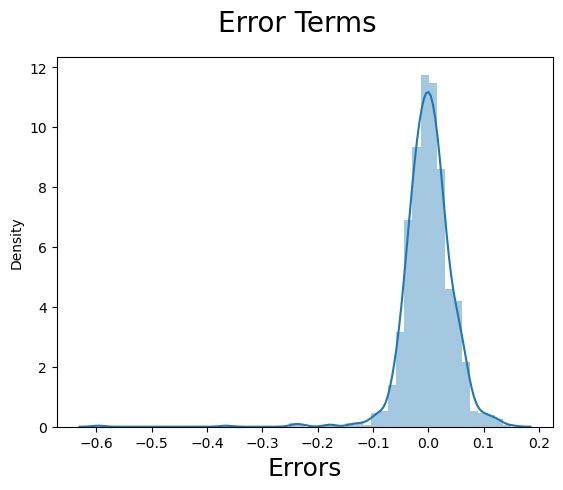

In [488]:
#residual analysis
res=y_train-y_pred_train
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 50)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

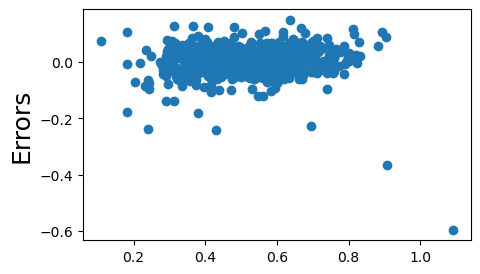

In [489]:
#From the above histogram, we could see that the Residuals are normally distributed. 
#Hence our assumption for Linear Regression is valid.
#plot error vs predicted y values
plt.figure(figsize=(5, 3))
plt.scatter(x=y_pred_train,y=res)
plt.ylabel('Errors', fontsize = 18) 
plt.show()

In [490]:
#the error terms shows constant variance around except for two points only

In [491]:

#Applying the scaling on the test sets
df1_test[num_cols]=scaler.transform(df1_test[num_cols])

df1_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,age,age_remd,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Noalleyaccess,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_NoMason,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,CentralAir_Y,Electrical_SBrkr,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,logsales
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.181044,0.040959,0.563420,0.573345,0.062394,1.374429,2.073059,2.525114,3.849315,1.554795,3.584475,0.079914,1.198630,0.024626,0.241718,3.159817,0.176926,0.011393,0.204004,0.027397,0.522070,0.362443,1.513699,0.195586,1.712329,0.332319,2.815068,2.803653,0.112381,0.073669,0.034478,0.004993,0.033281,0.598174,0.265394,0.365107,0.095890,0.205479,0.054795,0.796804,0.143836,1.0,0.945205,0.630137,0.892694,0.059361,0.739726,0.134703,0.057078,0.047945,0.150685,0.057078,0.045662,0.075342,0.061644,0.047945,0.054795,0.867580,0.988584,0.077626,0.509132,0.317352,0.776256,0.203196,0.986301,0.164384,0.136986,0.082192,0.376712,0.125571,0.155251,0.134703,0.091324,0.367580,0.127854,0.319635,0.589041,0.082192,0.465753,0.429224,0.988584,0.958904,0.920091,0.929224,0.586758,0.052511,0.280822,0.059361,0.059361,0.292237,0.429224,0.926941,0.073059,0.894977,0.835616,0.079909,0.505088
std,0.111583,0.041173,0.146992,0.138721,0.101240,0.554973,0.350423,0.711500,0.578119,0.987548,2.062177,0.073110,0.718693,0.093665,0.181768,0.938391,0.082057,0.099833,0.099133,0.113919,0.182908,0.100695,0.647858,0.211663,1.773020,0.147560,0.759412,0.745872,0.139085,0.100341,0.101115,0.047585,0.125326,1.244924,0.216909,0.331196,0.294778,0.404514,0.227839,0.402838,0.351324,0.0,0.227839,0.483319,0.309856,0.236569,0.439286,0.341797,0.232256,0.213895,0.358151,0.232256,0.208990,0.264245,0.240783,0.213895,0.227839,0.339335,0.106353,0.267887,0.500488,0.465978,0.417229,0.402838,0.116370,0.371047,0.344226,0.27

In [492]:
y_test=df1_test["logsales"]
X_test=df1_test.drop("logsales",axis=1)
X_test_rfe = X_test[col]
X_test_rfe.shape

(438, 46)

In [493]:
print(lm.intercept_)
print(lm.coef_)

0.002501248761866859
[-0.02398553  0.15662225  0.19575016  0.1105719   0.01481065  0.06593888
 -0.02071142  0.10303526  0.32832455  0.01840891  0.03834423  0.04789615
  0.0750028   0.03830766  0.02977857  0.05146324  0.03754557 -0.07873759
 -0.02078646  0.01877977  0.03593227  0.04617161  0.01247832 -0.02979304
 -0.01768437  0.02680959  0.03700926  0.02267822  0.03179861 -0.02689638
 -0.04299875 -0.03879896  0.04733083 -0.02357555 -0.02306302 -0.01813136
 -0.02432669  0.01545831  0.02721815  0.01566648  0.01866512  0.0167139
  0.0211719  -0.01414811  0.01568328  0.02108472]


#### Prediction and evaluation metrics

In [494]:
y_pred_test = lm.predict(X_test_rfe)
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8791020707935608
0.8847823987676091
2.133755820918935
0.8036813945362039
0.0020898685807237364
0.0018348890286214701


### Regularisation

In [495]:
#defining a regularization function
def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_pred_train = final_model.predict(X_train)
  y_pred_test = final_model.predict(X_test)
  
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_pred_train))
  print('R2 score (test) : ',r2_score(y_test,y_pred_test))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

  return final_model, y_pred_test, y_pred_train, alpha

### Ridge Regression

In [497]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_pred_test_ridge, y_pred_train_ridge, alpha\
= build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 0.000100
ridge  Regression with  0.0001
R2 score (train) :  0.8791020707657484
R2 score (test) :  0.8847823661840942
RMSE (train) :  0.04571508045715887
RMSE (test) :  0.04283561074068777


In [498]:
# Printing the best hyperparameter alpha
print(alpha)

0.0001


In [499]:
# Lets store metrics such as R2 score, RSS and RMSE for comparison

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print(mse_test_lr)
metric2.append(np.sqrt(mse_test_lr))

0.8791020707657484
0.8847823661840942
2.1337558214098036
0.8036816218171439
0.002089868581204509
0.0018348895475277258


### Lasso

In [500]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_pred_test_lasso, y_pred_train_lasso, alpha =\
build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.000010
lasso  Regression with  1e-05
R2 score (train) :  0.8790729261215632
R2 score (test) :  0.8852665874988478
RMSE (train) :  0.04572059035081524
RMSE (test) :  0.04274550407117091


In [501]:
# Printing the best hyperparameter alpha
alpha

1e-05

In [502]:
#store the R2 score, RSS and RMSE metrics for lasso

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8790729261215632
0.8852665874988478
2.134270202049628
0.8003040158147383
0.00209037238202706
0.0018271781182984893


### Evaluation and model selection

In [503]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.879102,0.879102,0.879073
1,R2 Score (Test),0.884782,0.884782,0.885267
2,RSS (Train),2.133756,2.133756,2.134270
3,RSS (Test),0.803681,0.803682,0.800304
4,MSE (Train),0.045715,0.045715,0.045721
5,MSE (Test),0.042836,0.042836,0.042746


In [ ]:
#from the above metrics comparison, we see that the with optimal no of predictors the Linear regression is as good as
#Ridge regression, basically no regularisation is applied in Ridge. However, all metrics are working slightly better in 
#Lasso regression on unseen test data, hence, Choosing Lasso as the final model.

In [506]:
### Comparing Model Coefficients
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Linear Regression']=lm.coef_
model_coefficients['Ridge (alpha=.0001)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.00001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Linear Regression,Ridge (alpha=.0001),Lasso (alpha=0.00001)
LotFrontage,-0.023986,-0.023985,-0.022653
LotArea,0.156622,0.156614,0.150730
OverallQual,0.195750,0.195750,0.195703
OverallCond,0.110572,0.110571,0.110389
BsmtQual,0.014811,0.014811,0.014958
BsmtFinSF1,0.065939,0.065938,0.064207
BsmtUnfSF,-0.020711,-0.020712,-0.020768
1stFlrSF,0.103035,0.103037,0.103030
GrLivArea,0.328325,0.328315,0.327396
FullBath,0.018409,0.018411,0.018611


In [507]:
# features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.00001)']].sort_values(by='Lasso (alpha=0.00001)', ascending=False)
#the strenth of the coefficients are in line with the visualization results

,Lasso (alpha=0.00001)
GrLivArea,0.327396
OverallQual,0.195703
LotArea,0.150730
OverallCond,0.110389
1stFlrSF,0.103030
GarageArea,0.075062
BsmtFinSF1,0.064207
3SsnPorch,0.048514
Fireplaces,0.048478
RoofMatl_CompShg,0.044917


In [514]:
#Top ten feature impacting sales price are:
abs(model_coefficients[['Lasso (alpha=0.00001)']]).sort_values(by='Lasso (alpha=0.00001)', ascending=False).index[:10]

Index(['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', '1stFlrSF', 'age',
       'GarageArea', 'BsmtFinSF1', '3SsnPorch', 'Fireplaces'],
      dtype='object')

### Summary
- top 10 features in order of descending importance are ['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', '1stFlrSF', 'age',
       'GarageArea', 'BsmtFinSF1', '3SsnPorch', 'Fireplaces']
- these results are in line with intuitions we got from visualization, plotted agains target variable. If we consider first six variables, sales price increases when the living area, overall quality grade (of material/finish), overall condition, Lot size, 1st floor area of house increase. On the other hand, if the age of the house is more i,e for old houses, the sales price gets decreased.
- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.327396 with unit change in the feature 'GrLivArea' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. 

### Code for Subjective question

In [515]:
#Q1. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
#What will be the most important predictor variables after the change is implemented?.
ridge = Ridge(alpha=0.0002)
ridge.fit(X_train_rfe,y_train)
# Predicting
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression alpha=.0002")
print('R2 score (train) : ',r2_score(y_train,y_pred_train))
print('R2 score (test) : ',r2_score(y_test,y_pred_test))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

lasso = Lasso(alpha=0.00002)
lasso.fit(X_train_rfe,y_train)
# Predicting
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)
print("=============")
print("Model Evaluation : Lasso Regression alpha=0.00002")
print('R2 score (train) : ',r2_score(y_train,y_pred_train))
print('R2 score (test) : ',r2_score(y_test,y_pred_test))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Model Evaluation : Ridge Regression alpha=.0002
R2 score (train) :  0.8791020706823203
R2 score (test) :  0.8847823335235915
RMSE (train) :  0.045715080472932185
RMSE (test) :  0.04283561681194803
Model Evaluation : Lasso Regression alpha=0.00002
R2 score (train) :  0.8789856817448308
R2 score (test) :  0.8856834276080051
RMSE (train) :  0.04573708022808691
RMSE (test) :  0.04266778366948434


In [520]:
#check Coefficients
model_coefficients['Ridge alpha=.0002']=ridge.coef_
model_coefficients['Lasso alpha=0.00002']=lasso.coef_
abs(model_coefficients[["Lasso alpha=0.00002"]]).sort_values(by='Lasso alpha=0.00002', ascending=False).head(10)

,Lasso alpha=0.00002
GrLivArea,0.326470
OverallQual,0.195657
LotArea,0.144838
OverallCond,0.110205
1stFlrSF,0.103020
age,0.076970
GarageArea,0.075121
BsmtFinSF1,0.062481
Fireplaces,0.049059
3SsnPorch,0.045566


In [528]:
#Q3.After building the model, you realised that the five most important predictor variables in the lasso model are 
#not available in the incoming data. You will now have to create another model excluding the five most 
#important predictor variables. Which are the five most important predictor variables now?

#the five most important factor in the original lasso models are 
#['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', '1stFlrSF']
#drop then as mentioned in the question
X_train_drop=X_train_rfe.drop(['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', '1stFlrSF'], axis=1, errors="ignore")
X_test_drop=X_test_rfe.drop(['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', '1stFlrSF'], axis=1, errors="ignore")
lasso_drop=Lasso(alpha=.00002)
lasso_drop.fit(X_train_drop, y_train)
y_train_pred = lasso_drop.predict(X_train_drop)
y_test_pred = lasso_drop.predict(X_test_drop)

In [529]:
model_coeff = pd.DataFrame(index=X_test_drop.columns)
model_coeff['Lasso'] = lasso_drop.coef_
#five most important features
abs(model_coeff).sort_values(by='Lasso', ascending=False).head(5)


,Lasso
BsmtFinSF1,0.234023
BedroomAbvGr,0.167870
GarageArea,0.150012
Fireplaces,0.118172
FullBath,0.109272
